In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
ins_df = pd.read_csv("insurance_data.csv")

In [4]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
ins_df.shape

(3000, 10)

In [6]:

ins_df.describe(include = "all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [7]:
duplicate = ins_df.duplicated()
duplicate.sum()

139

In [8]:
ins_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [9]:
ins_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

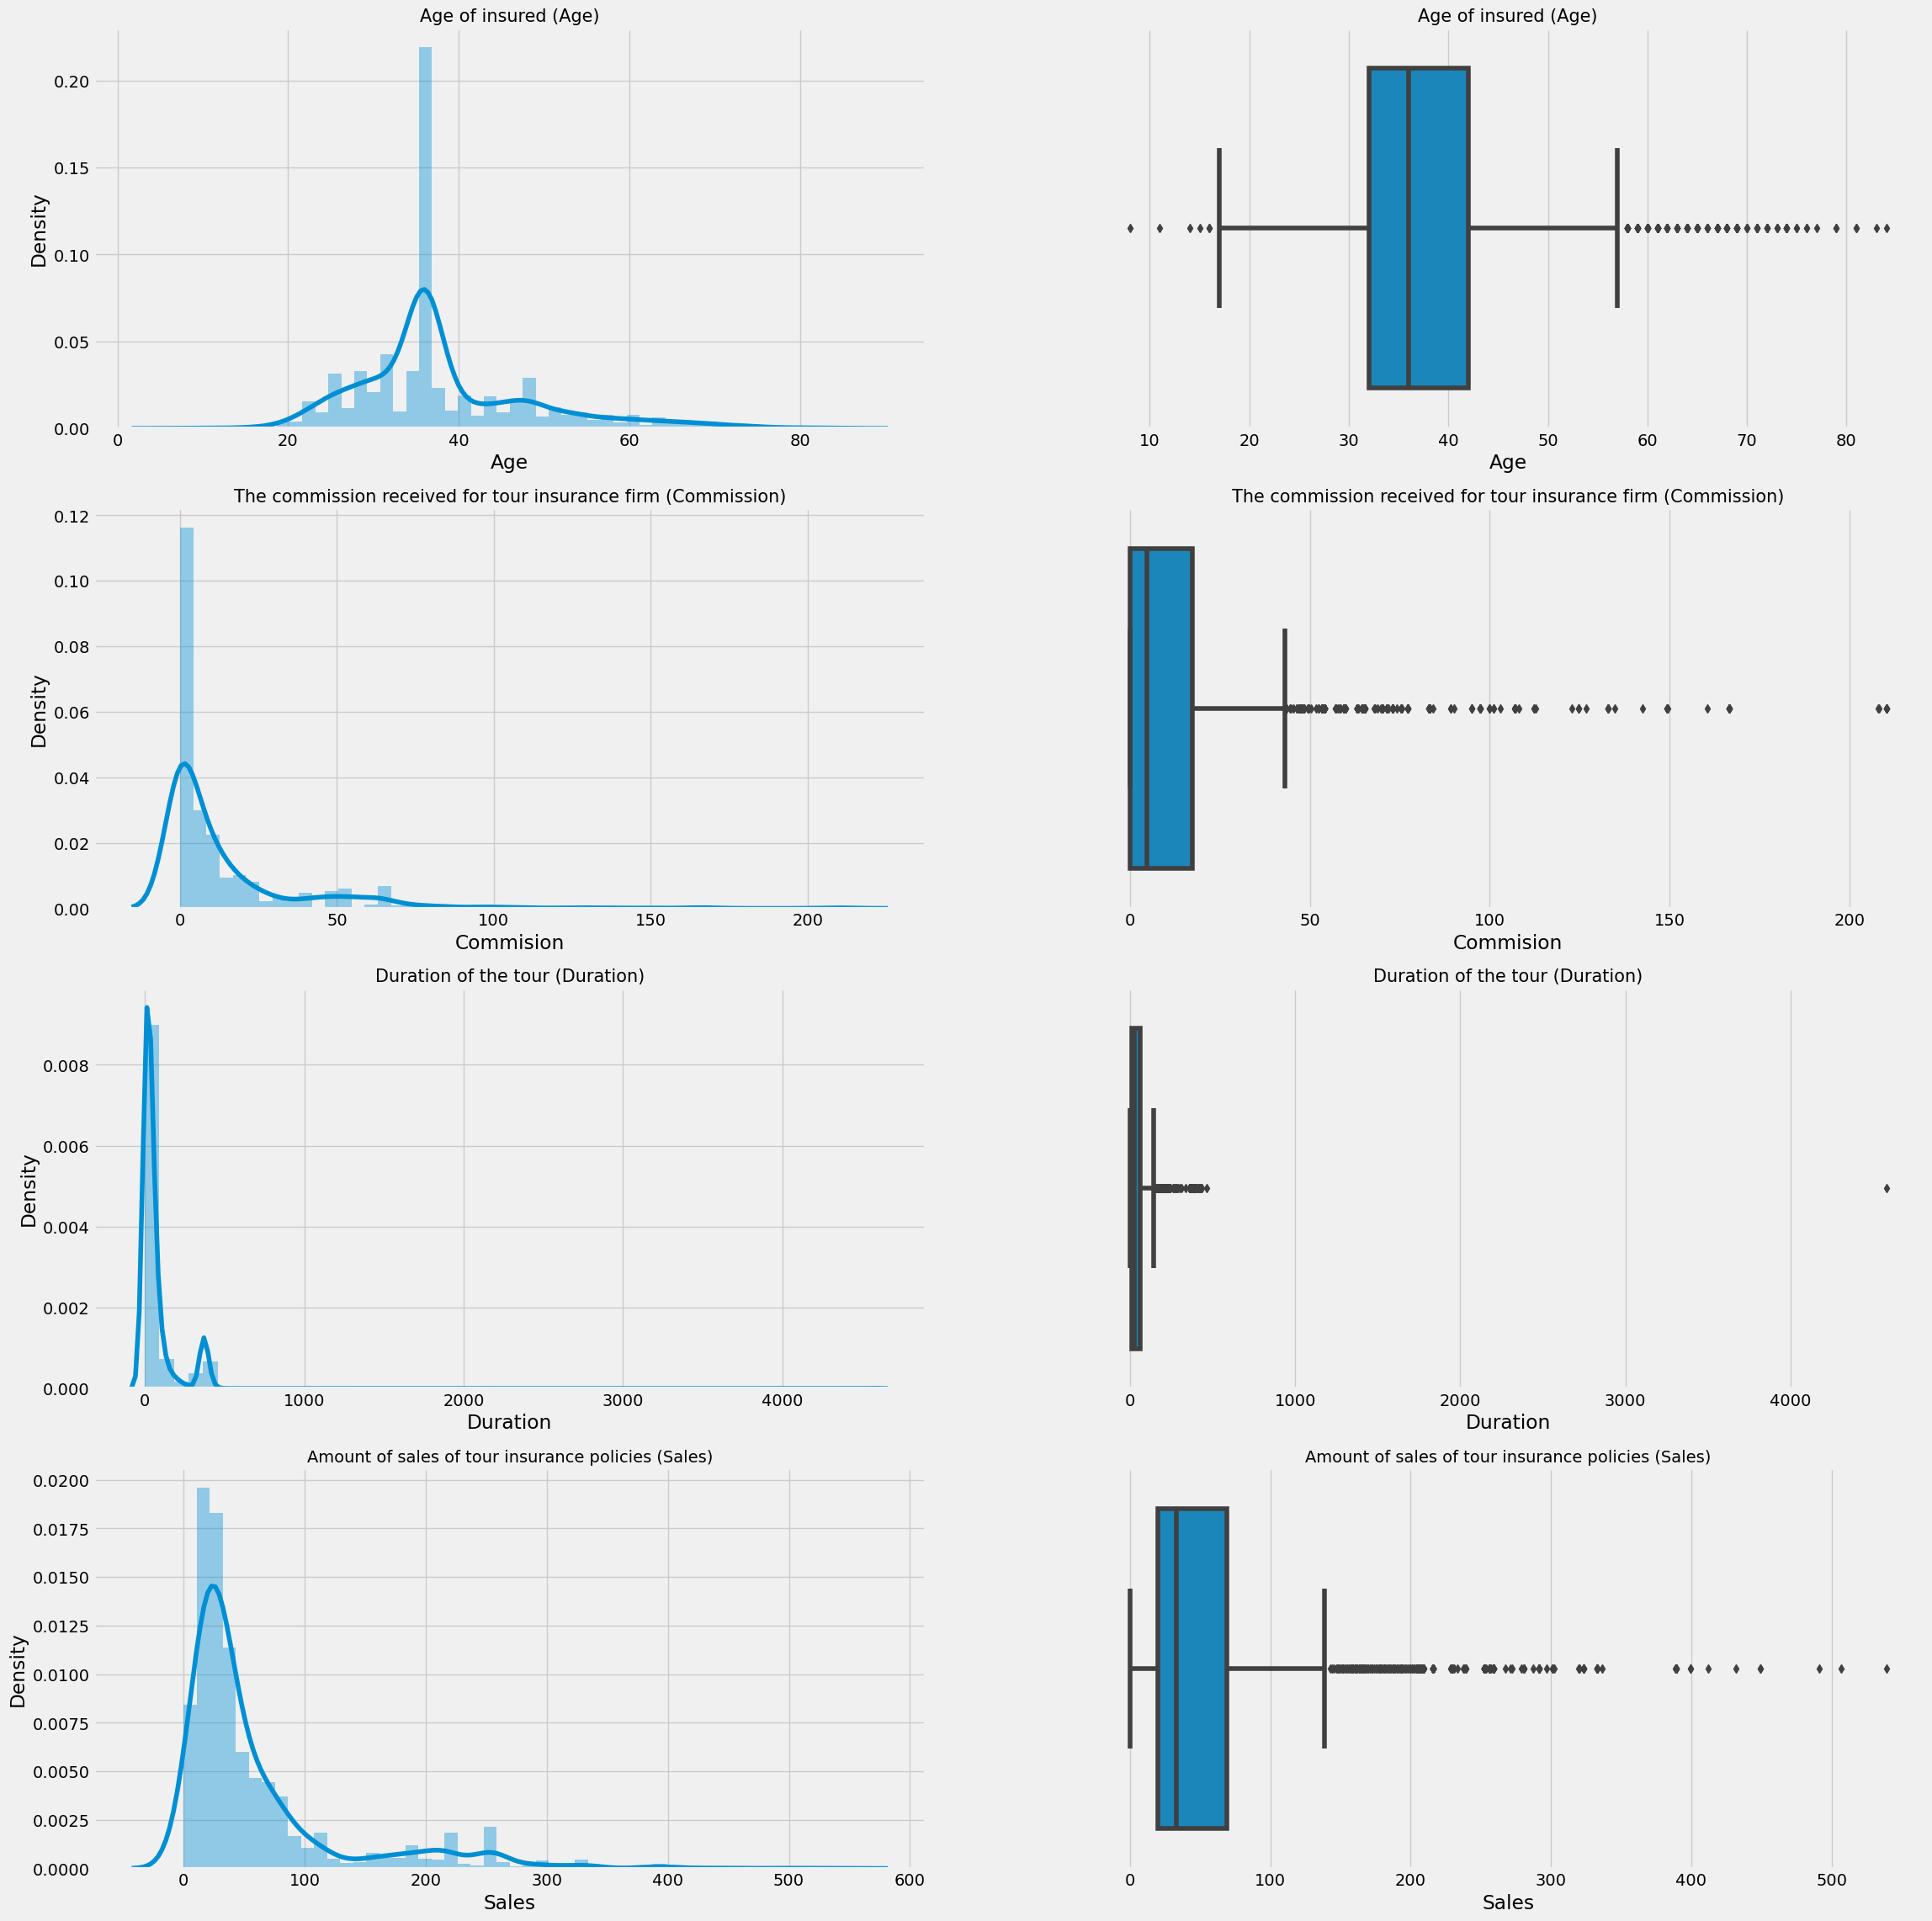

In [10]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(25, 27)
a = sns.distplot(ins_df['Age'] , ax=axes[0][0])
a.set_title("Age of insured (Age)",fontsize=15)
a = sns.boxplot(ins_df['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age of insured (Age)",fontsize=15)

a = sns.distplot(ins_df['Commision'] , ax=axes[1][0])
a.set_title("The commission received for tour insurance firm (Commission)",fontsize=15)


a = sns.boxplot(ins_df['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("The commission received for tour insurance firm (Commission)",fontsize=15)

a = sns.distplot(ins_df['Duration'] , ax=axes[2][0])
a.set_title("Duration of the tour (Duration)",fontsize=15)

a = sns.boxplot(ins_df['Duration'] , orient = "v" , ax=axes[2][1])
a.set_title("Duration of the tour (Duration)",fontsize=15)


a = sns.distplot(ins_df['Sales'] ,ax=axes[3][0])
a.set_title("Amount of sales of tour insurance policies (Sales)",fontsize=14)

a = sns.boxplot(ins_df['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Amount of sales of tour insurance policies (Sales)",fontsize=14)

plt.show();

In [11]:
ins_df.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

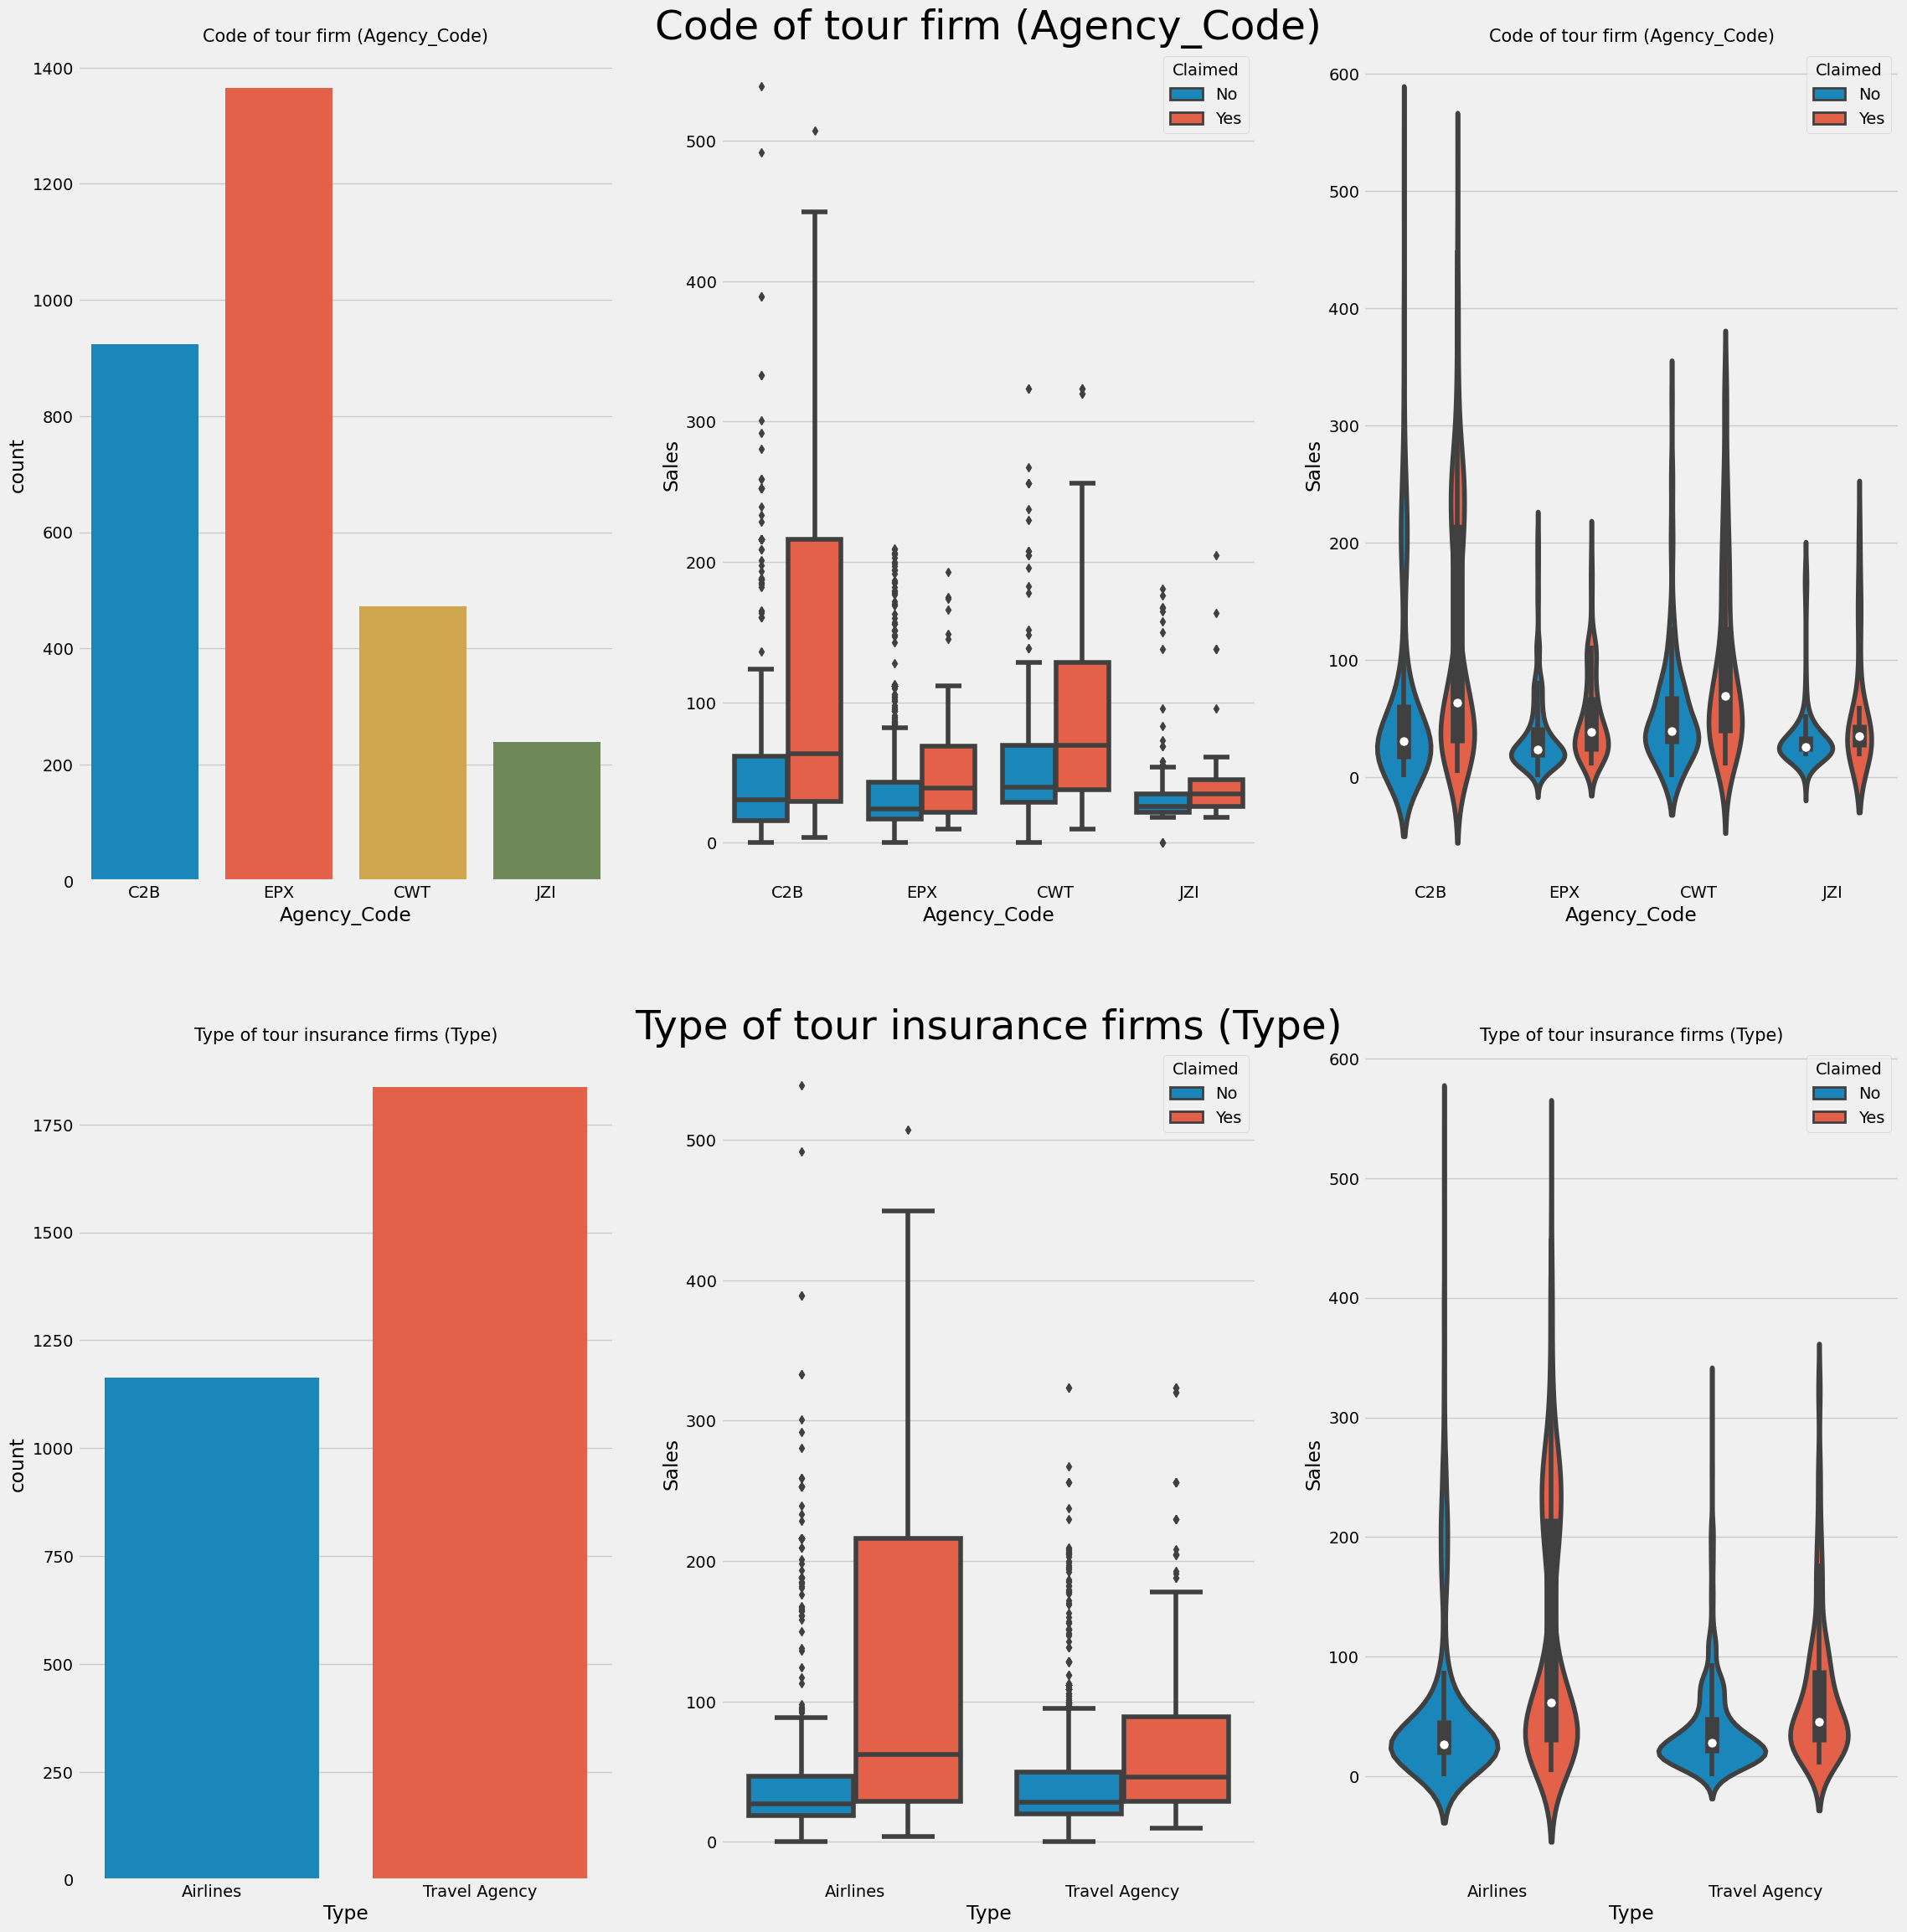

In [12]:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(25, 27)
a = sns.countplot(data = ins_df, x ='Agency_Code',ax=axes[0][0])
a.set_title("Code of tour firm (Agency_Code)",fontsize=15)
a = sns.boxplot(data = ins_df, x='Agency_Code',y='Sales', hue='Claimed', ax=axes[0][1])
a.set_title("Code of tour firm (Agency_Code)",fontsize=35)
a = sns.violinplot(data = ins_df, x = 'Agency_Code',y='Sales',hue='Claimed', ax=axes[0][2])
a.set_title("Code of tour firm (Agency_Code)",fontsize=15)


a = sns.countplot(data = ins_df, x ='Type',ax=axes[1][0])
a.set_title("Type of tour insurance firms (Type)",fontsize=15)
a = sns.boxplot(data = ins_df, x='Type',y='Sales', hue='Claimed', ax=axes[1][1])
a.set_title("Type of tour insurance firms (Type)",fontsize=35)
a = sns.violinplot(data = ins_df, x = 'Type',y='Sales',hue='Claimed', ax=axes[1][2])
a.set_title("Type of tour insurance firms (Type)",fontsize=15)

plt.show();

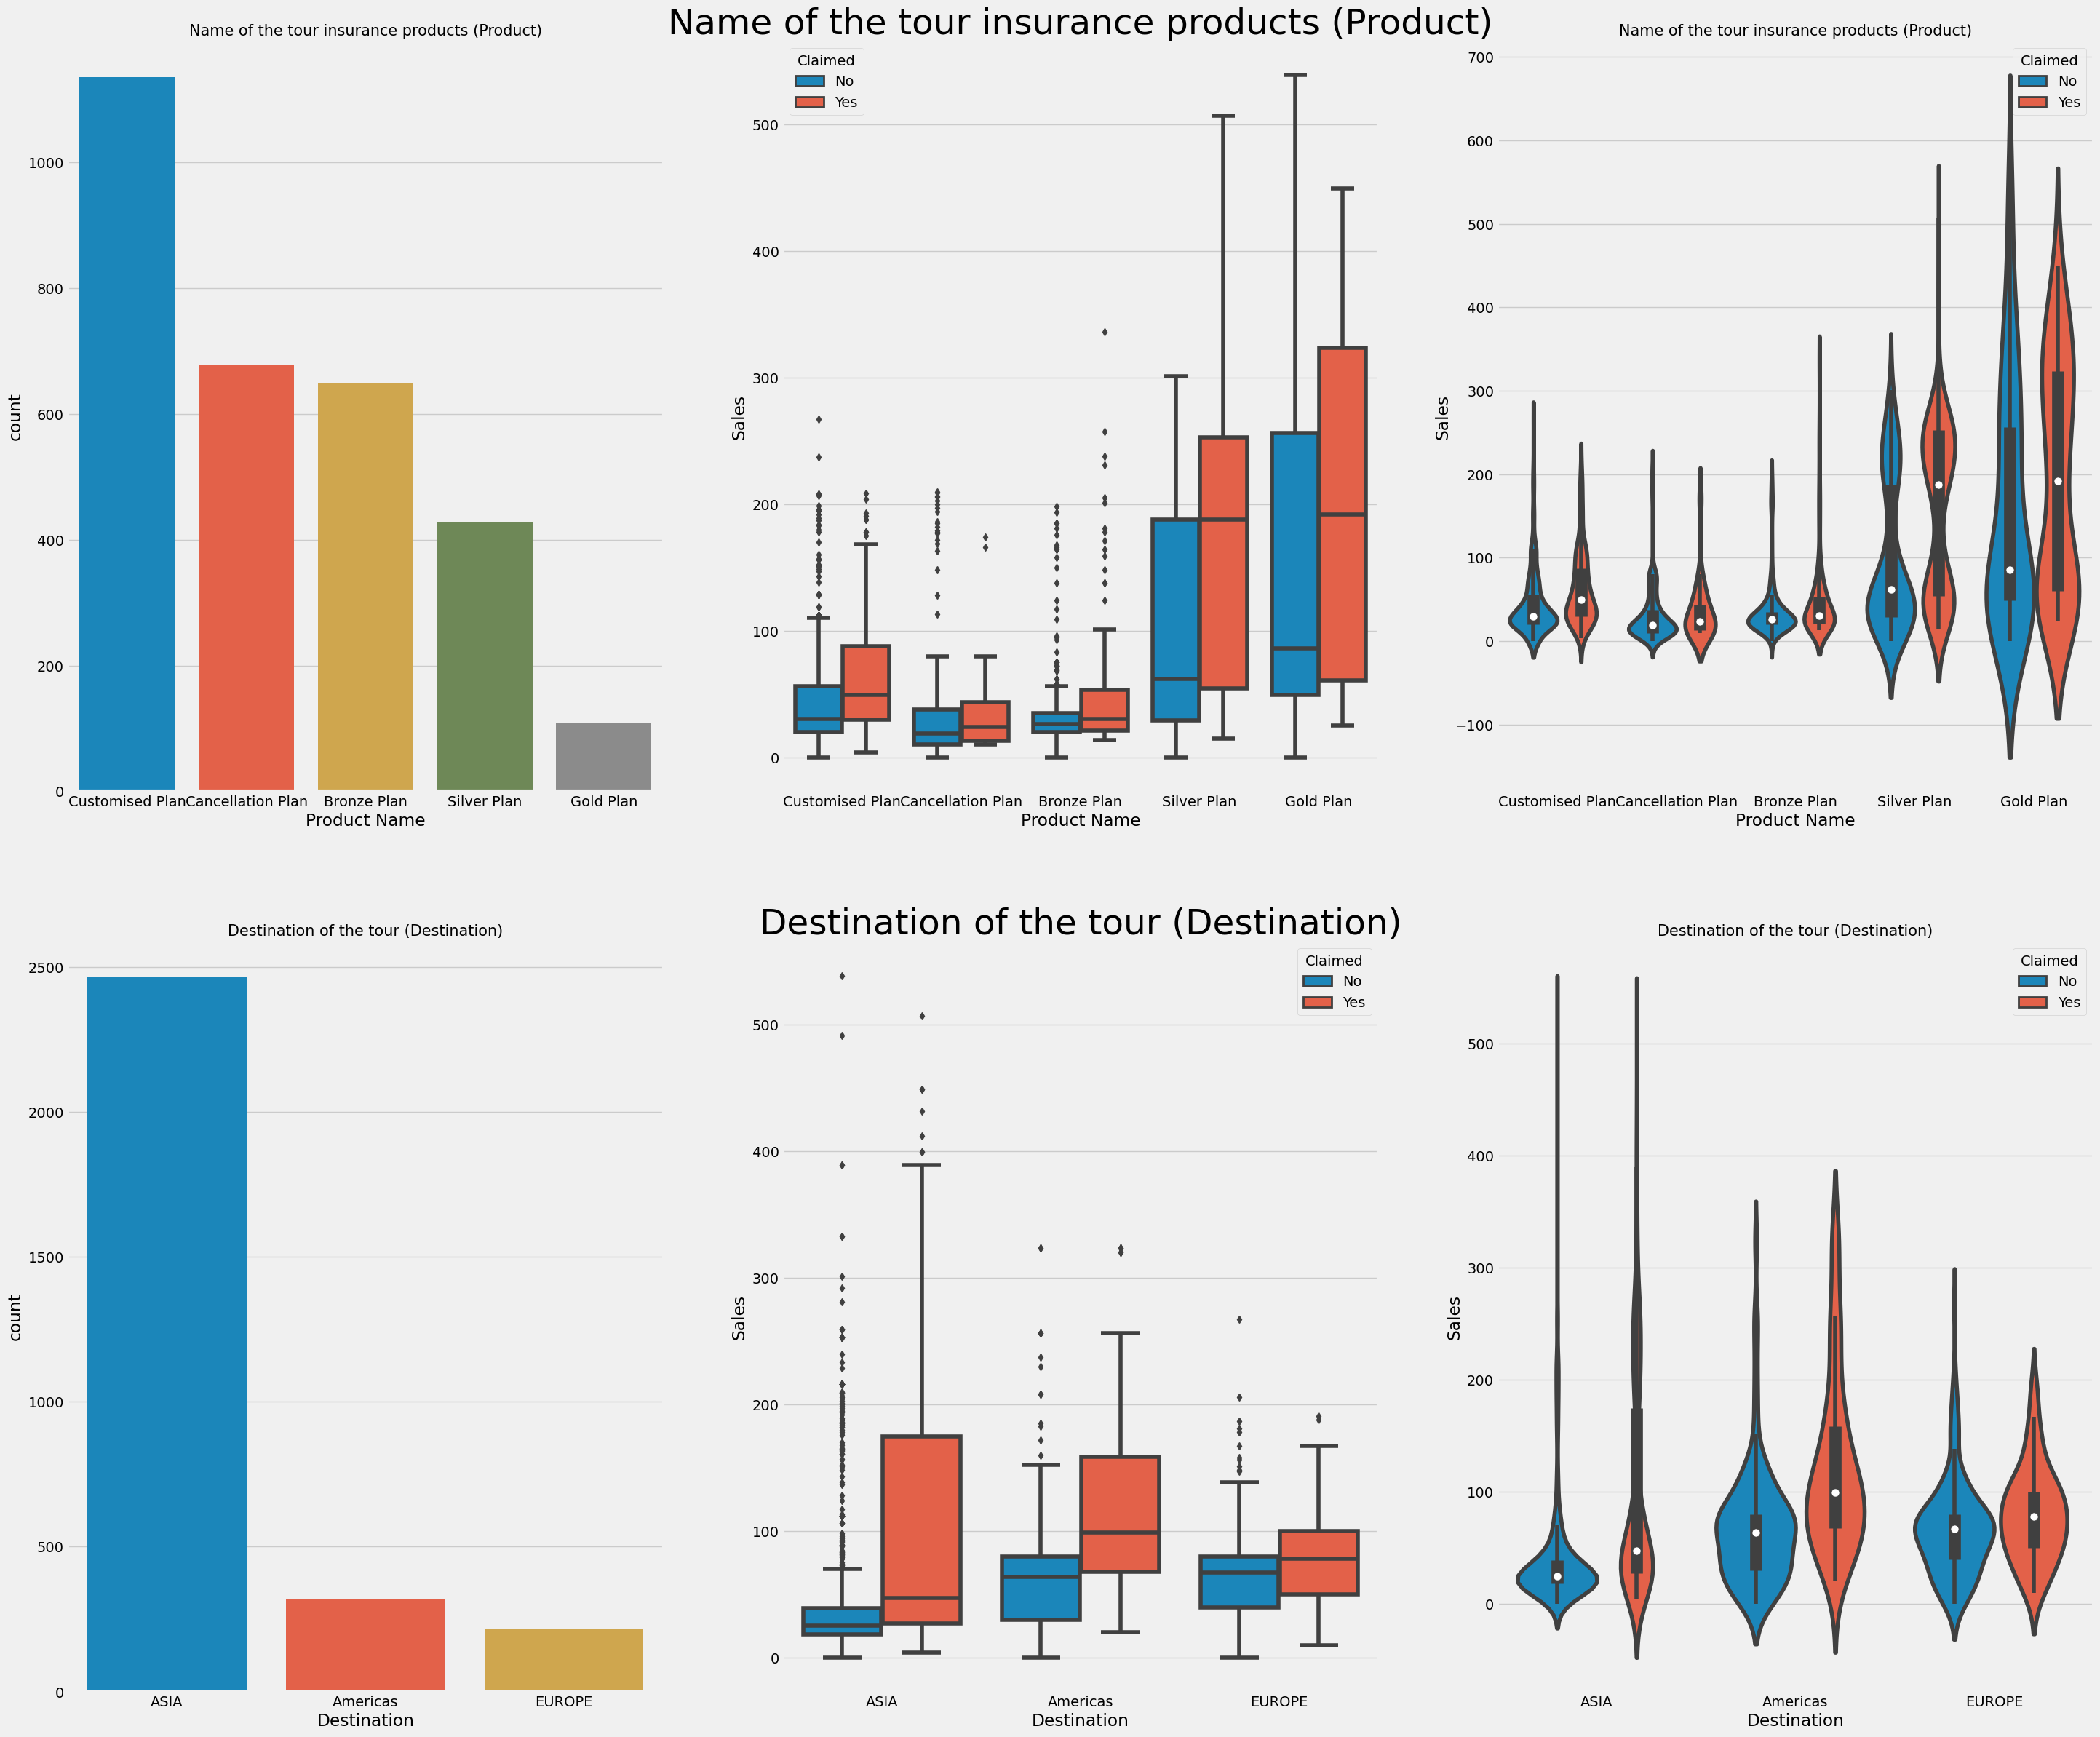

In [13]:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(32, 28)

a = sns.countplot(data = ins_df, x ='Product Name',ax=axes[0][0])

a.set_title("Name of the tour insurance products (Product)",fontsize=15)

a = sns.boxplot(data = ins_df, x='Product Name',y='Sales', hue='Claimed', ax=axes[0][1])
a.set_title("Name of the tour insurance products (Product)",fontsize=35)

a = sns.violinplot(data = ins_df, x = 'Product Name',y='Sales',hue='Claimed', ax=axes[0][2])

a.set_title("Name of the tour insurance products (Product)",fontsize=15)


a = sns.countplot(data = ins_df, x ='Destination',ax=axes[1][0])
a.set_title("Destination of the tour (Destination)",fontsize=15)
a = sns.boxplot(data = ins_df, x='Destination',y='Sales', hue='Claimed', ax=axes[1][1])
a.set_title("Destination of the tour (Destination)",fontsize=35)
a = sns.violinplot(data = ins_df, x = 'Destination',y='Sales',hue='Claimed', ax=axes[1][2])
a.set_title("Destination of the tour (Destination)",fontsize=15)

plt.show();

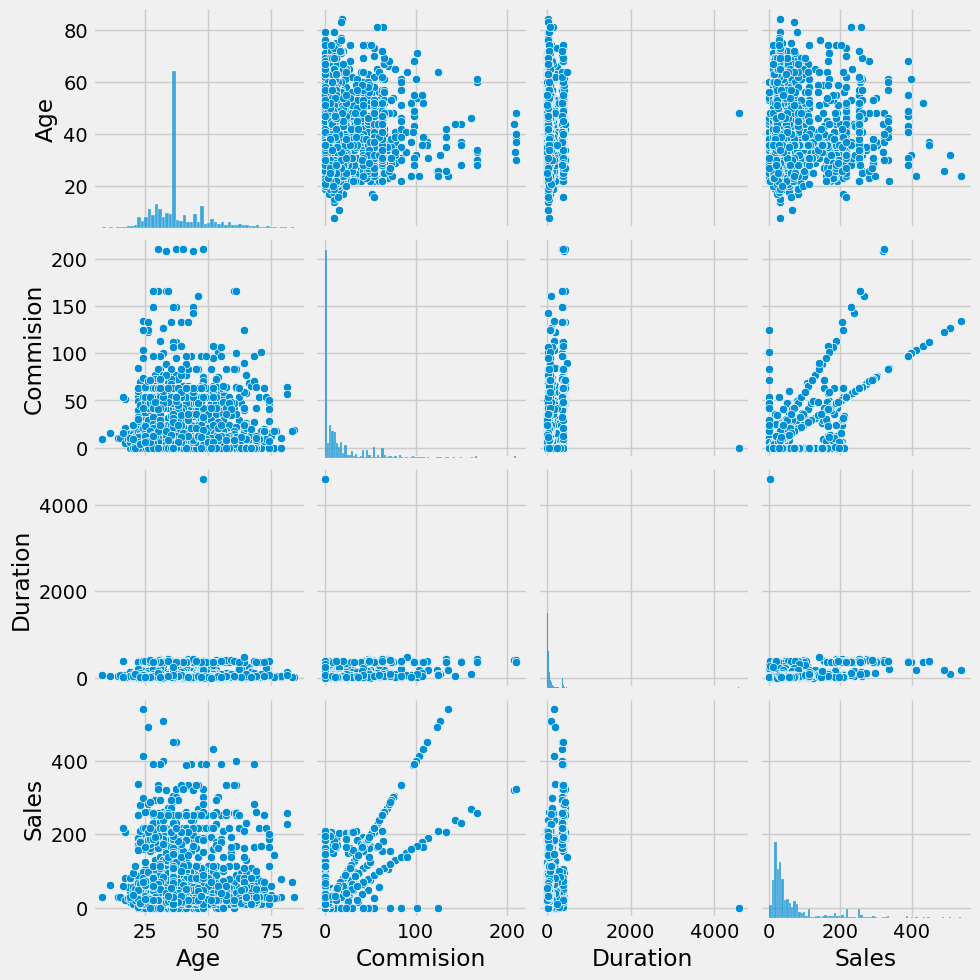

In [14]:
sns.pairplot(ins_df);

In [15]:
corr = ins_df.corr()
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


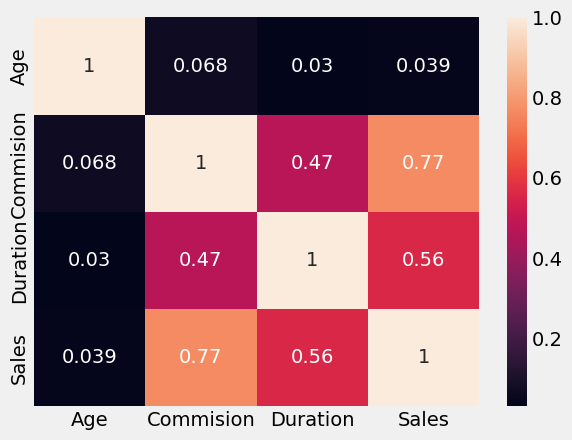

In [16]:
sns.heatmap(corr,annot=True);

In [17]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
23.76      61
54.00      61
17.82      57
         ... 
49.40       1
68.08       1
15.56       1
1.25        1
13.50       1
Name: Commision, Length: 324, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Duration 
 8      83
5      82
10     81
6      81
11     81
       ..
393     1
244     1
208     1
431     1
416     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
171.00      1
159.00      1
177.00      1
1.99        1
287.40      

In [18]:
ins_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [19]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [20]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [21]:
print(ins_df.Claimed.value_counts(normalize=True))
print('%0s',ins_df.Claimed.value_counts()[0],'\n','%1s',ins_df.Claimed.value_counts()[1])

0    0.692
1    0.308
Name: Claimed, dtype: float64
%0s 2076 
 %1s 924


In [22]:
ld_df = ins_df

In [23]:
X = ld_df.drop("Claimed", axis=1)

y = ld_df.pop("Claimed") 

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [25]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,
                              max_features=4,
                              random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [27]:
rfcl

RandomForestClassifier(max_features=4, random_state=1)

In [28]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [29]:
rfcl.score(X_train,train_labels)

0.9947619047619047

In [30]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,6],
    'max_features': [4,5],
    'min_samples_leaf': [11,15],
    'min_samples_split': [50,55],
    'n_estimators': [290,350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 2)

In [31]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [11, 15],
                         'min_samples_split': [50, 55],
                         'n_estimators': [290, 350, 400]})

In [32]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 290}

In [33]:
best_grid = grid_search.best_estimator_

In [34]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



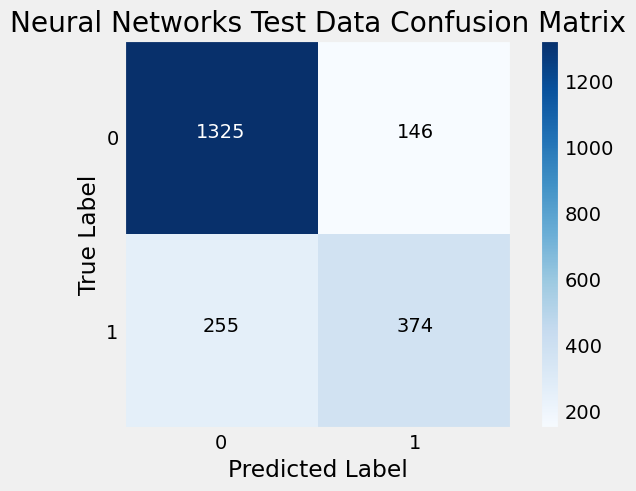

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(train_labels, ytrain_predict)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(test_labels)))
plt.xticks(tick_marks, np.unique(test_labels))
plt.yticks(tick_marks, np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.grid(b=False, which='both')
plt.show()

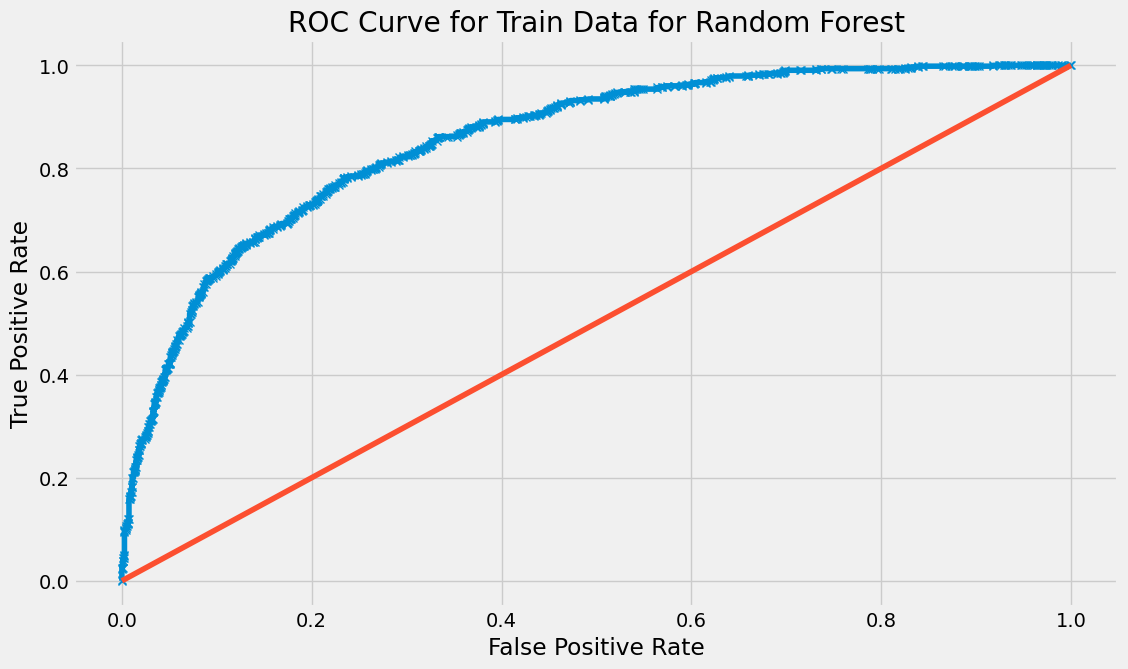

Area under Curve is 0.8549789842627847


In [38]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

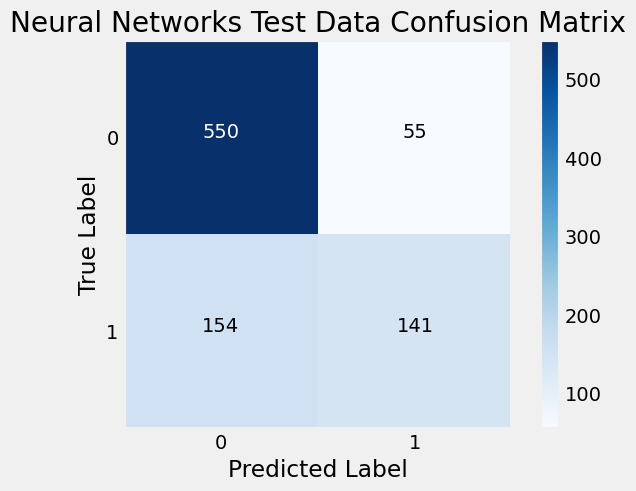

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(test_labels, ytest_predict)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(test_labels)))
plt.xticks(tick_marks, np.unique(test_labels))
plt.yticks(tick_marks, np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.grid(b=False, which='both')
plt.show()

In [39]:
best_grid.score(X_test,test_labels)

0.7677777777777778

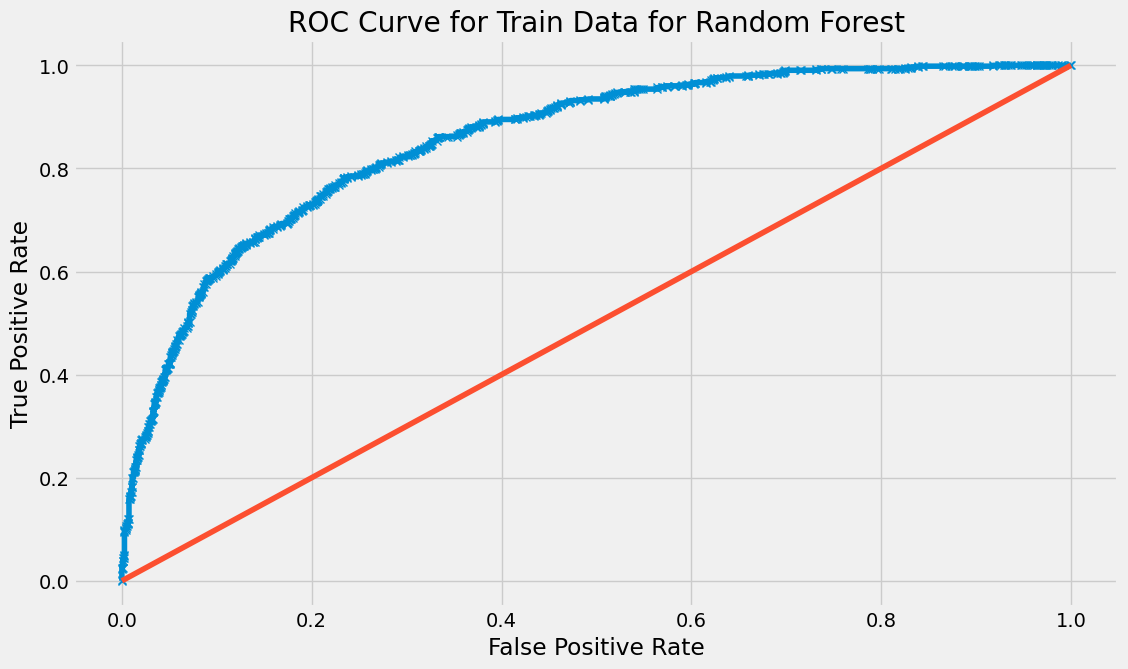

Area under Curve is 0.8549789842627847


In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

In [42]:
#END